# Pymaceuticals Inc.
---

### Analysis
* We can see that capomulin and ramicane are the largest test group both with over 200 mice test (bar chart)
* The gender distribution for this drug test has an equal split about 51% male and 49% female (pie chart)
* We can see that there is a positive correlation between weight and average tumor (correlation and regression)

In [287]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st


from pandas.plotting import table 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_path = pd.read_csv(mouse_metadata_path)
study_results_path = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_table_df = pd.merge(study_results_path, mouse_metadata_path, on="Mouse ID", how="left")


In [288]:
# Display the data table for preview
merged_table_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [289]:
# Checking the number of mice.
mouse = mouse_metadata_path["Mouse ID"].count()
mouse

249

In [290]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = merged_table_df.loc[merged_table_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice_id                           

array(['g989'], dtype=object)

In [291]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mice_id= merged_table_df.loc[merged_table_df["Mouse ID"]!='g989']
len(duplicate_mice_id["Mouse ID"].unique())

248

In [292]:
# Checking the number of mice in the clean DataFrame.
clean_df = duplicate_mice_id.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


## Summary Statistics

In [293]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = merged_table_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merged_table_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merged_table_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = merged_table_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merged_table_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance, "Tumor Volume Standard Deviation": standard_dv, "Tumor Volume Std. Err.": sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [294]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_df = merged_table_df.groupby('Drug Regimen')
agg_sum_df = summary_df.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
agg_sum_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [295]:
unique_count = merged_table_df["Drug Regimen"].value_counts()
unique_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

## Bar and Pie Charts

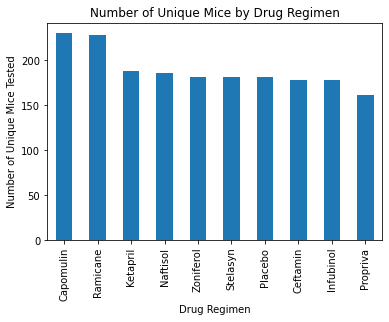

In [296]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
unique_count.plot(kind="bar")

plt.title("Number of Unique Mice by Drug Regimen")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.show()


Text(0, 0.5, 'Number of Unique Mice Tested')

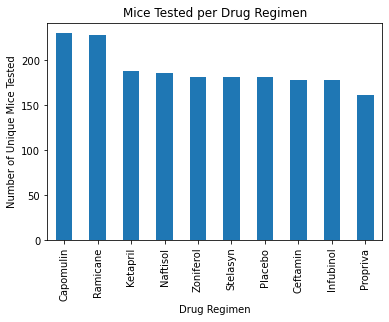

In [297]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
uniquechart = unique_count.plot(kind="bar", title="Mice Tested per Drug Regimen")
uniquechart.set_xlabel("Drug Regimen")
uniquechart.set_ylabel("Number of Unique Mice Tested")

In [298]:
gender_df = pd.DataFrame(merge_table.groupby(["Sex"]).count()).reset_index()
gender_df.head()


,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [299]:
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

,Sex,Count
0,Female,935
1,Male,958


In [300]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
startangle=180, shadow=False, labels=gender_df['Sex'], legend = False, fontsize=150

SyntaxError: unexpected EOF while parsing (<ipython-input-300-1702cb7b6cb0>, line 5)

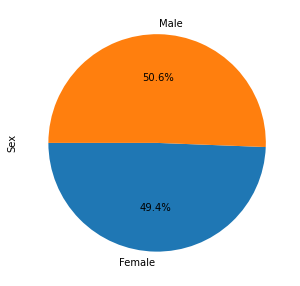

In [301]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
secondpie = bygender["Mouse ID"].plot.pie(y='sizes', figsize=(5, 5), autopct="%1.1f%%",startangle=180)
plt.ylabel('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [302]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor_df = pd.DataFrame(merged_table_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
tumor_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(merged_table_df, tumor_df, on='Mouse ID')
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),max_timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45


In [303]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice_df = merged_df.loc[merged_df['Drug Regimen'] == drug]
    # add subset 
    final_volume_df = mice_df.loc[mice_df['Timepoint'] == mice_df['max_timepoint']]
   
    values = final_volume_df['Tumor Volume (mm3)']
    tumor_vol_list.append(values)
    
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # Determine outliers using upper and lower bounds
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'{drug}s potential outliers: {outliers_count}')

Capomulins potential outliers: 0
Ramicanes potential outliers: 0
Infubinols potential outliers: 1
Ceftamins potential outliers: 0


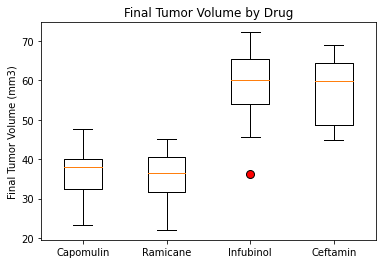

In [304]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

plt.boxplot(tumor_vol_list, flierprops=flierprops)

plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

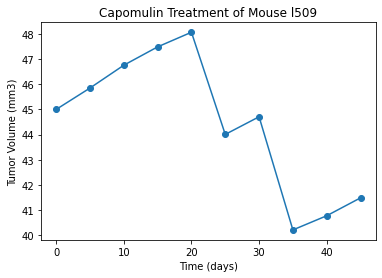

In [305]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
lineplot = merged_table_df.loc[merged_table_df['Mouse ID'] == 'l509']

plt.plot(lineplot['Timepoint'], lineplot['Tumor Volume (mm3)'], marker = 'o')
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")

plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

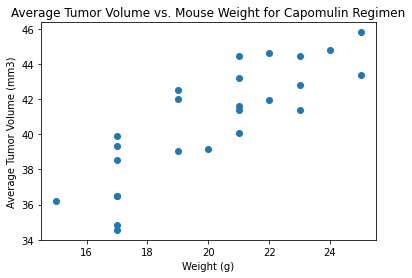

In [306]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mice = merged_table_df[merged_table_df['Drug Regimen'] == 'Capomulin']
micecap= mice.groupby(['Mouse ID'])
micecap = pd.DataFrame(micecap.mean())

plt.scatter(micecap['Weight (g)'], micecap['Tumor Volume (mm3)'])
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


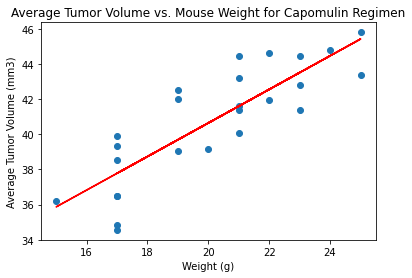

In [283]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_val = micecap['Weight (g)']
y_val = micecap['Tumor Volume (mm3)']

correlation = st.pearsonr(x_val, y_val)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xval, yval)
regress_values = xval * slope + intercept
line_reg = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xval, yval)
plt.plot(xval,regress_values,"r-")
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.")